$$
\textbf{Exploratory Data Analysis and Preprocessing of Loan Data}
$$



![](https://dxc.scene7.com/is/image/dxc/AdobeStock-564060898:banner_desktop)

#### Dataset Description
* **Loan_ID**: Unique identifier for the loan (e.g., LP001002, LP001003, ...)

* **Gender**: Gender of the applicant (Male or Female)

* **Married**: Marital status of the applicant (Married or Not Married)

* **Dependents**: Number of family members (e.g., 0, 1, 2, 3+)

* **Education**: Level of education/qualification of the applicant (Graduate or Under Graduate)

* **Self_Employed**: Employment status of the applicant (Yes for self-employed, No for employed/others)

* **ApplicantIncome**: Monthly salary/income of the applicant

* **CoapplicantIncome**: Monthly salary/income of the additional applicant

* **LoanAmount**: Amount of the loan requested

* **Loan_Amount_Term**: Repayment period of the loan (in days)

* **Credit_History**: Previous credit history record (0 = bad credit history, 1 = good credit history)

* **Property_Area**: Location of the property (Rural, Semiurban, Urban)

* **Loan_Status**: Status of the loan application (Y = accepted, N = not accepted)


### Importing libraries and dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas.plotting as pd_plotting
import scipy.stats as stats
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [46]:
#Loading the dataset
df=pd.read_csv("/content/sample_data/loan_data_set.csv")

## Preprocessing


In [47]:
#Dataframe dimensions
df.shape

(614, 13)

In [48]:
#Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
#columns types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
#Drop Unecessary Variables
df = df.drop(['Loan_ID'], axis = 1)

In [52]:
#checking for missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
# Mode imputation for categorical variables
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [54]:
# Median imputation for numerical variables
for column in ['LoanAmount', 'Loan_Amount_Term']:
    df[column].fillna(df[column].median(), inplace=True)
# Mode imputation for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [55]:
# Verify if any missing values remain
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [56]:
#Checking for duplicated data
df.duplicated().sum()

0

In [57]:
#Summary statistics for all columns
df.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [58]:
#identifying the categorical variables
categorical = (df.dtypes == "object")
categorical = list(categorical[categorical].index)
print(f'Categorical variables: {categorical}')

Categorical variables: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [59]:
# Identifying the numerical variables (both float64 and int64)
numerical = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f'Numerical variables: {numerical}')

Numerical variables: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Univariate Descriptive Analysis

### Qualitative

In [60]:
df["Education"].tail(10)

604        Graduate
605    Not Graduate
606        Graduate
607    Not Graduate
608        Graduate
609        Graduate
610        Graduate
611        Graduate
612        Graduate
613        Graduate
Name: Education, dtype: object

In [61]:
#descriptive statistics such as the mean, standard deviation, and quartiles for the “Education” column
df["Education"].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

In [62]:
#Identifying unique values in the “Education” column
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [63]:
#Create a cross-tabulation showing the frequency of unique values in the “Education” column
t1=pd.crosstab(df["Education"], "freq")
t1

col_0,freq
Education,
Graduate,480
Not Graduate,134


In [64]:
#Create a normalized cross-tabulation showing the frequency of unique values in the "Education" column
t2=pd.crosstab(df["Education"], "freq", normalize =True)
t2

col_0,freq
Education,
Graduate,0.781759
Not Graduate,0.218241


##### Bar Chart


<Axes: xlabel='Education', ylabel='count'>

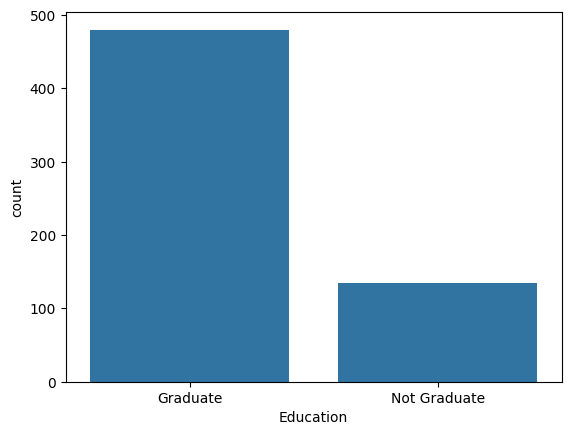

In [65]:
#Create a bar chart and visualize the frequencies of unique values in the "Education" column
sns.countplot(x = "Education", data = df)

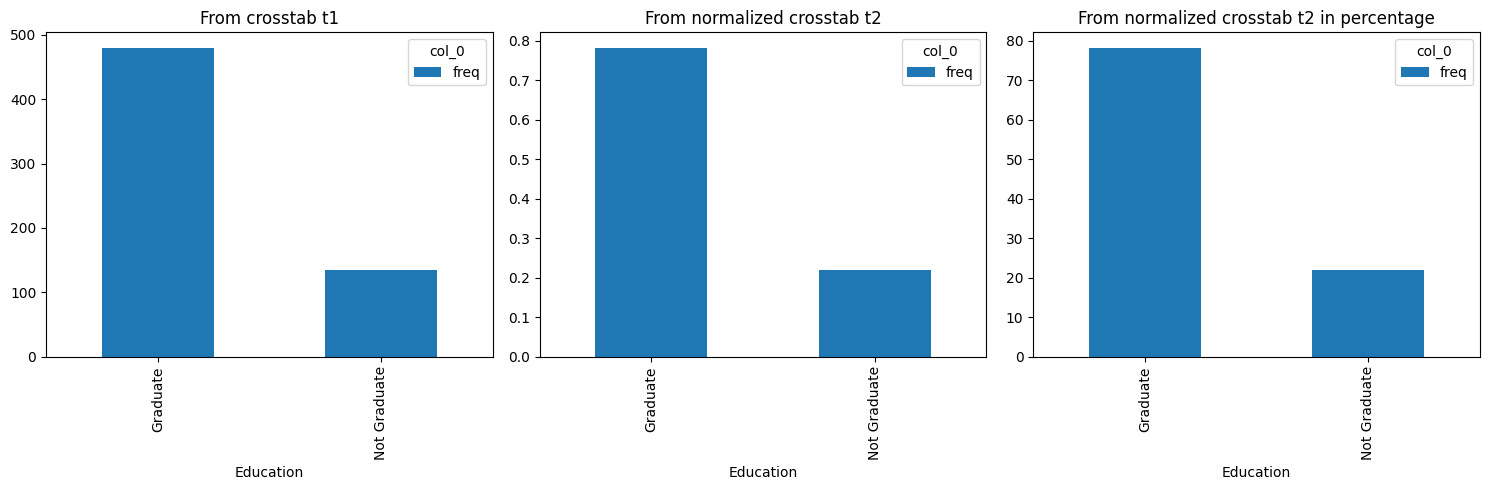

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Create a figure and subplots

# First subplot: from the crosstab t1
t1.plot.bar(ax=axes[0])
axes[0].set_title('From crosstab t1')

# Second subplot: from the normalized crosstab t2
t2.plot.bar(ax=axes[1])
axes[1].set_title('From normalized crosstab t2')

# Third subplot: from the normalized crosstab t2 in percentage
(t2 * 100).plot.bar(ax=axes[2])
axes[2].set_title('From normalized crosstab t2 in percentage')

plt.tight_layout()  # Automatically adjust subplots to avoid overlap
plt.show()  # Display the figure



##### Pie Chart

array([<Axes: ylabel='freq'>], dtype=object)

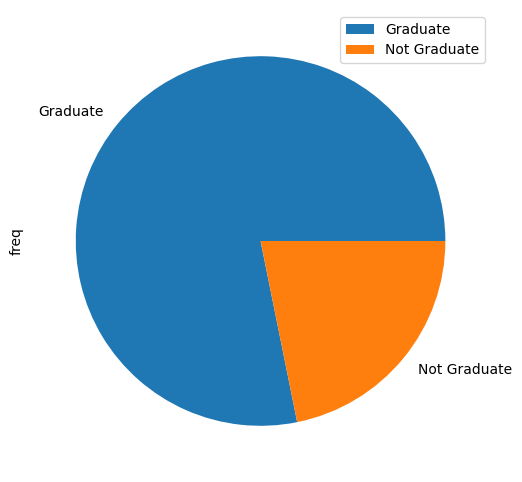

In [67]:
#Pie chart to visualize the distribution of values in the “Education” column
t1.plot.pie(subplots=True, figsize = (6, 6))

### Quantitative
Summary statistics of the data in the “Blood Pressure” column, including measures of central tendency, dispersion, and quartiles,

In [68]:
df["ApplicantIncome"].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

##### Evaluation of the Normality of Numerical Variables
To check the normality of our numerical data, we used the Shapiro-Wilk test to verify if the sample "ApplicantIncome" comes from a normal distribution. The result includes a test statistic and a p-value.

In [69]:
stats.shapiro(df["ApplicantIncome"])

ShapiroResult(statistic=0.47126346826553345, pvalue=4.8126138406832944e-39)

* Statistic: 0.471 - This value measures how much the data deviates from a normal distribution. Values close to 1 suggest the data is closer to normal.
* P-value: 4.81e-39 - This very small p-value indicates that the deviation from normality is statistically significant.

=>The ApplicantIncome data is not normally distributed.

##### Histogram of variable "ApplicantIncome"


(array([353., 180.,  44.,  15.,  12.,   3.,   0.,   0.,   1.,   3.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  150. ,  4192.5,  8235. , 12277.5, 16320. , 20362.5, 24405. ,
        28447.5, 32490. , 36532.5, 40575. , 44617.5, 48660. , 52702.5,
        56745. , 60787.5, 64830. , 68872.5, 72915. , 76957.5, 81000. ]),
 <BarContainer object of 20 artists>)

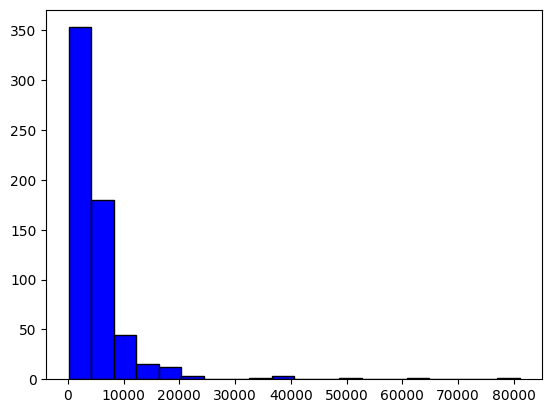

In [70]:
plt.hist(df['ApplicantIncome'], bins=20, color='blue', edgecolor='black')

<Axes: >

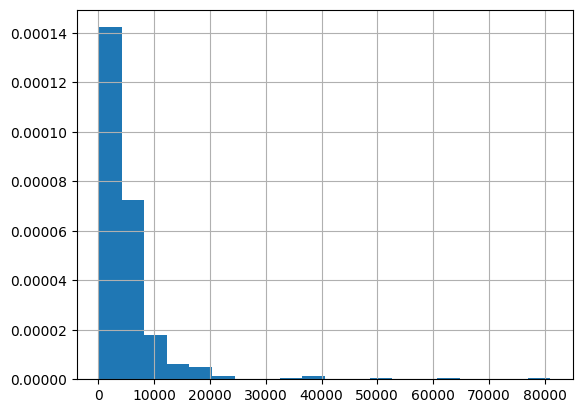

In [71]:
#Histogram using Normalization
df['ApplicantIncome'].hist(bins = 20, density = True)

##### KDE (Kernel Density Estimate) Plot

Create a histogram for the 'ApplicantIncome' variable of the 'df' DataFrame with a superimposed density estimate (KDE - Kernel Density Estimation). The kde=True option adds a smooth curve representing the probability density estimate for the 'ApplicantIncome' values. This allows you to visualize both the distribution of the data in the form of a histogram and a continuous estimate of the probability density of this variable.

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

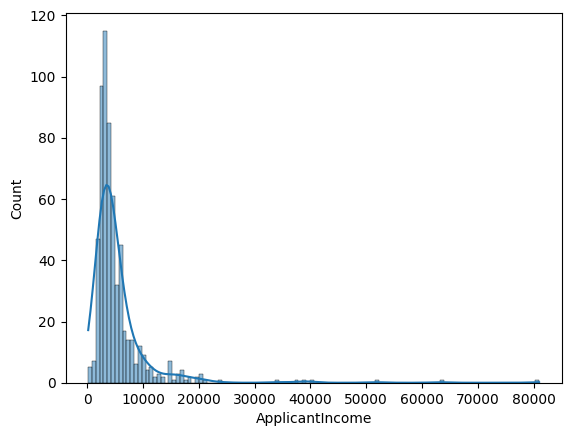

In [72]:
sns.histplot(data=df, x="ApplicantIncome", kde=True)

##### Boxplot for the variable "ApplicantIncome"
Generate a graphical representation of the dispersion measures of "ApplicantIncome" using a boxplot, highlighting the medians, quartiles, and interquartile ranges.

<Axes: >

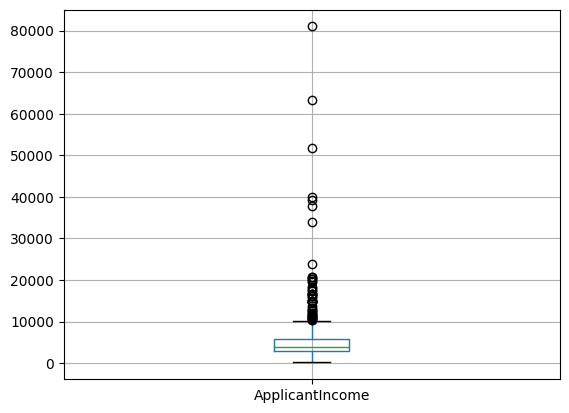

In [73]:
df.boxplot(column = "ApplicantIncome")

## Bivariate Descriptive Analysis

### Quantitative-Quantitative
<center><b><i>Hypothesis 1: "ApplicantIncome" & "LoanAmount".</i></b></center>

<center>
    <b>Null Hypothesis (H0)</b> :
There is no correlation between ApplicantIncome and LoanAmount.</center>


<center><b>Alternative Hypothesis (H1)</b> :
There is a significant correlation between ApplicantIncome and LoanAmount.</center>


##### Correlation Matrix

This operation calculates the correlation matrix between the numerical variables of a DataFrame, representing the strength and direction of linear relationships between these variables, thus providing an overview of the associations between them.

In [74]:
correlation_matrix = df[numerical].corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


Measure the correlation between "LoanAmount" and "ApplicantIncome"

In [75]:
df['LoanAmount'].corr(df['ApplicantIncome'])

0.5651805176233123

Measure the covariance between  "LoanAmount" and "ApplicantIncome" .It measures how two variables change together. It helps to understand the relationship between them .

In [76]:
df['LoanAmount'].cov(df['ApplicantIncome'])

290397.99806048104

##### Pearson's r Test
Calculate the Pearson correlation coefficient between the variables "LoanAmount" and "ApplicantIncome". This coefficient will quantify the strength and direction of the linear relationship between these variables. Additionally, a p-value will be provided to assess the statistical significance of the observed correlation.

In [77]:
from scipy.stats import pearsonr
pearsonr(df['LoanAmount'], df['ApplicantIncome'])

PearsonRResult(statistic=0.5651805176233123, pvalue=4.111256488076958e-53)

* Correlation Coefficient (Statistic): 0.565 - Indicates a moderate positive correlation.
* P-value: 4.11e-53 - This very small p-value indicates that the correlation is statistically significant.

=>Since the p-value is much smaller than typical significance levels (like 0.05 or 0.01), we reject the null hypothesis (H₀). This means there is strong evidence to support that a significant linear relationship exists between LoanAmount and ApplicantIncome.

##### Scatter Plot
Visualize the relationship between the variables "LoanAmount" and "ApplicantIncome" using a scatter plot. This will provide a visual representation of their correlation or potential relationship.

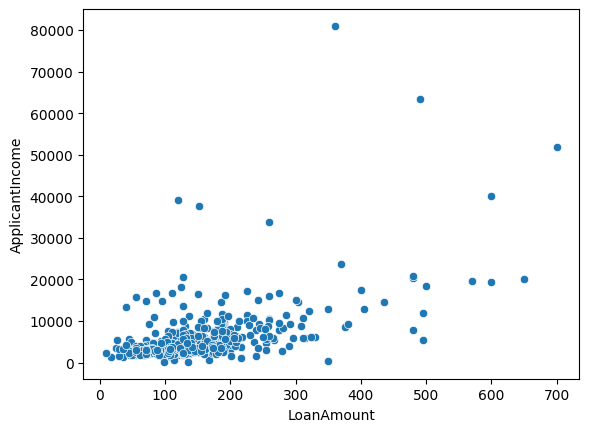

In [78]:
sns.scatterplot(x="LoanAmount", y="ApplicantIncome",data=df)
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')
plt.show()

##### Scatter Matrix
Generating a correlation matrix  will provide a dense view of the relationships between the variables, which can be useful for identifying correlation patterns or potential trends between the measures.

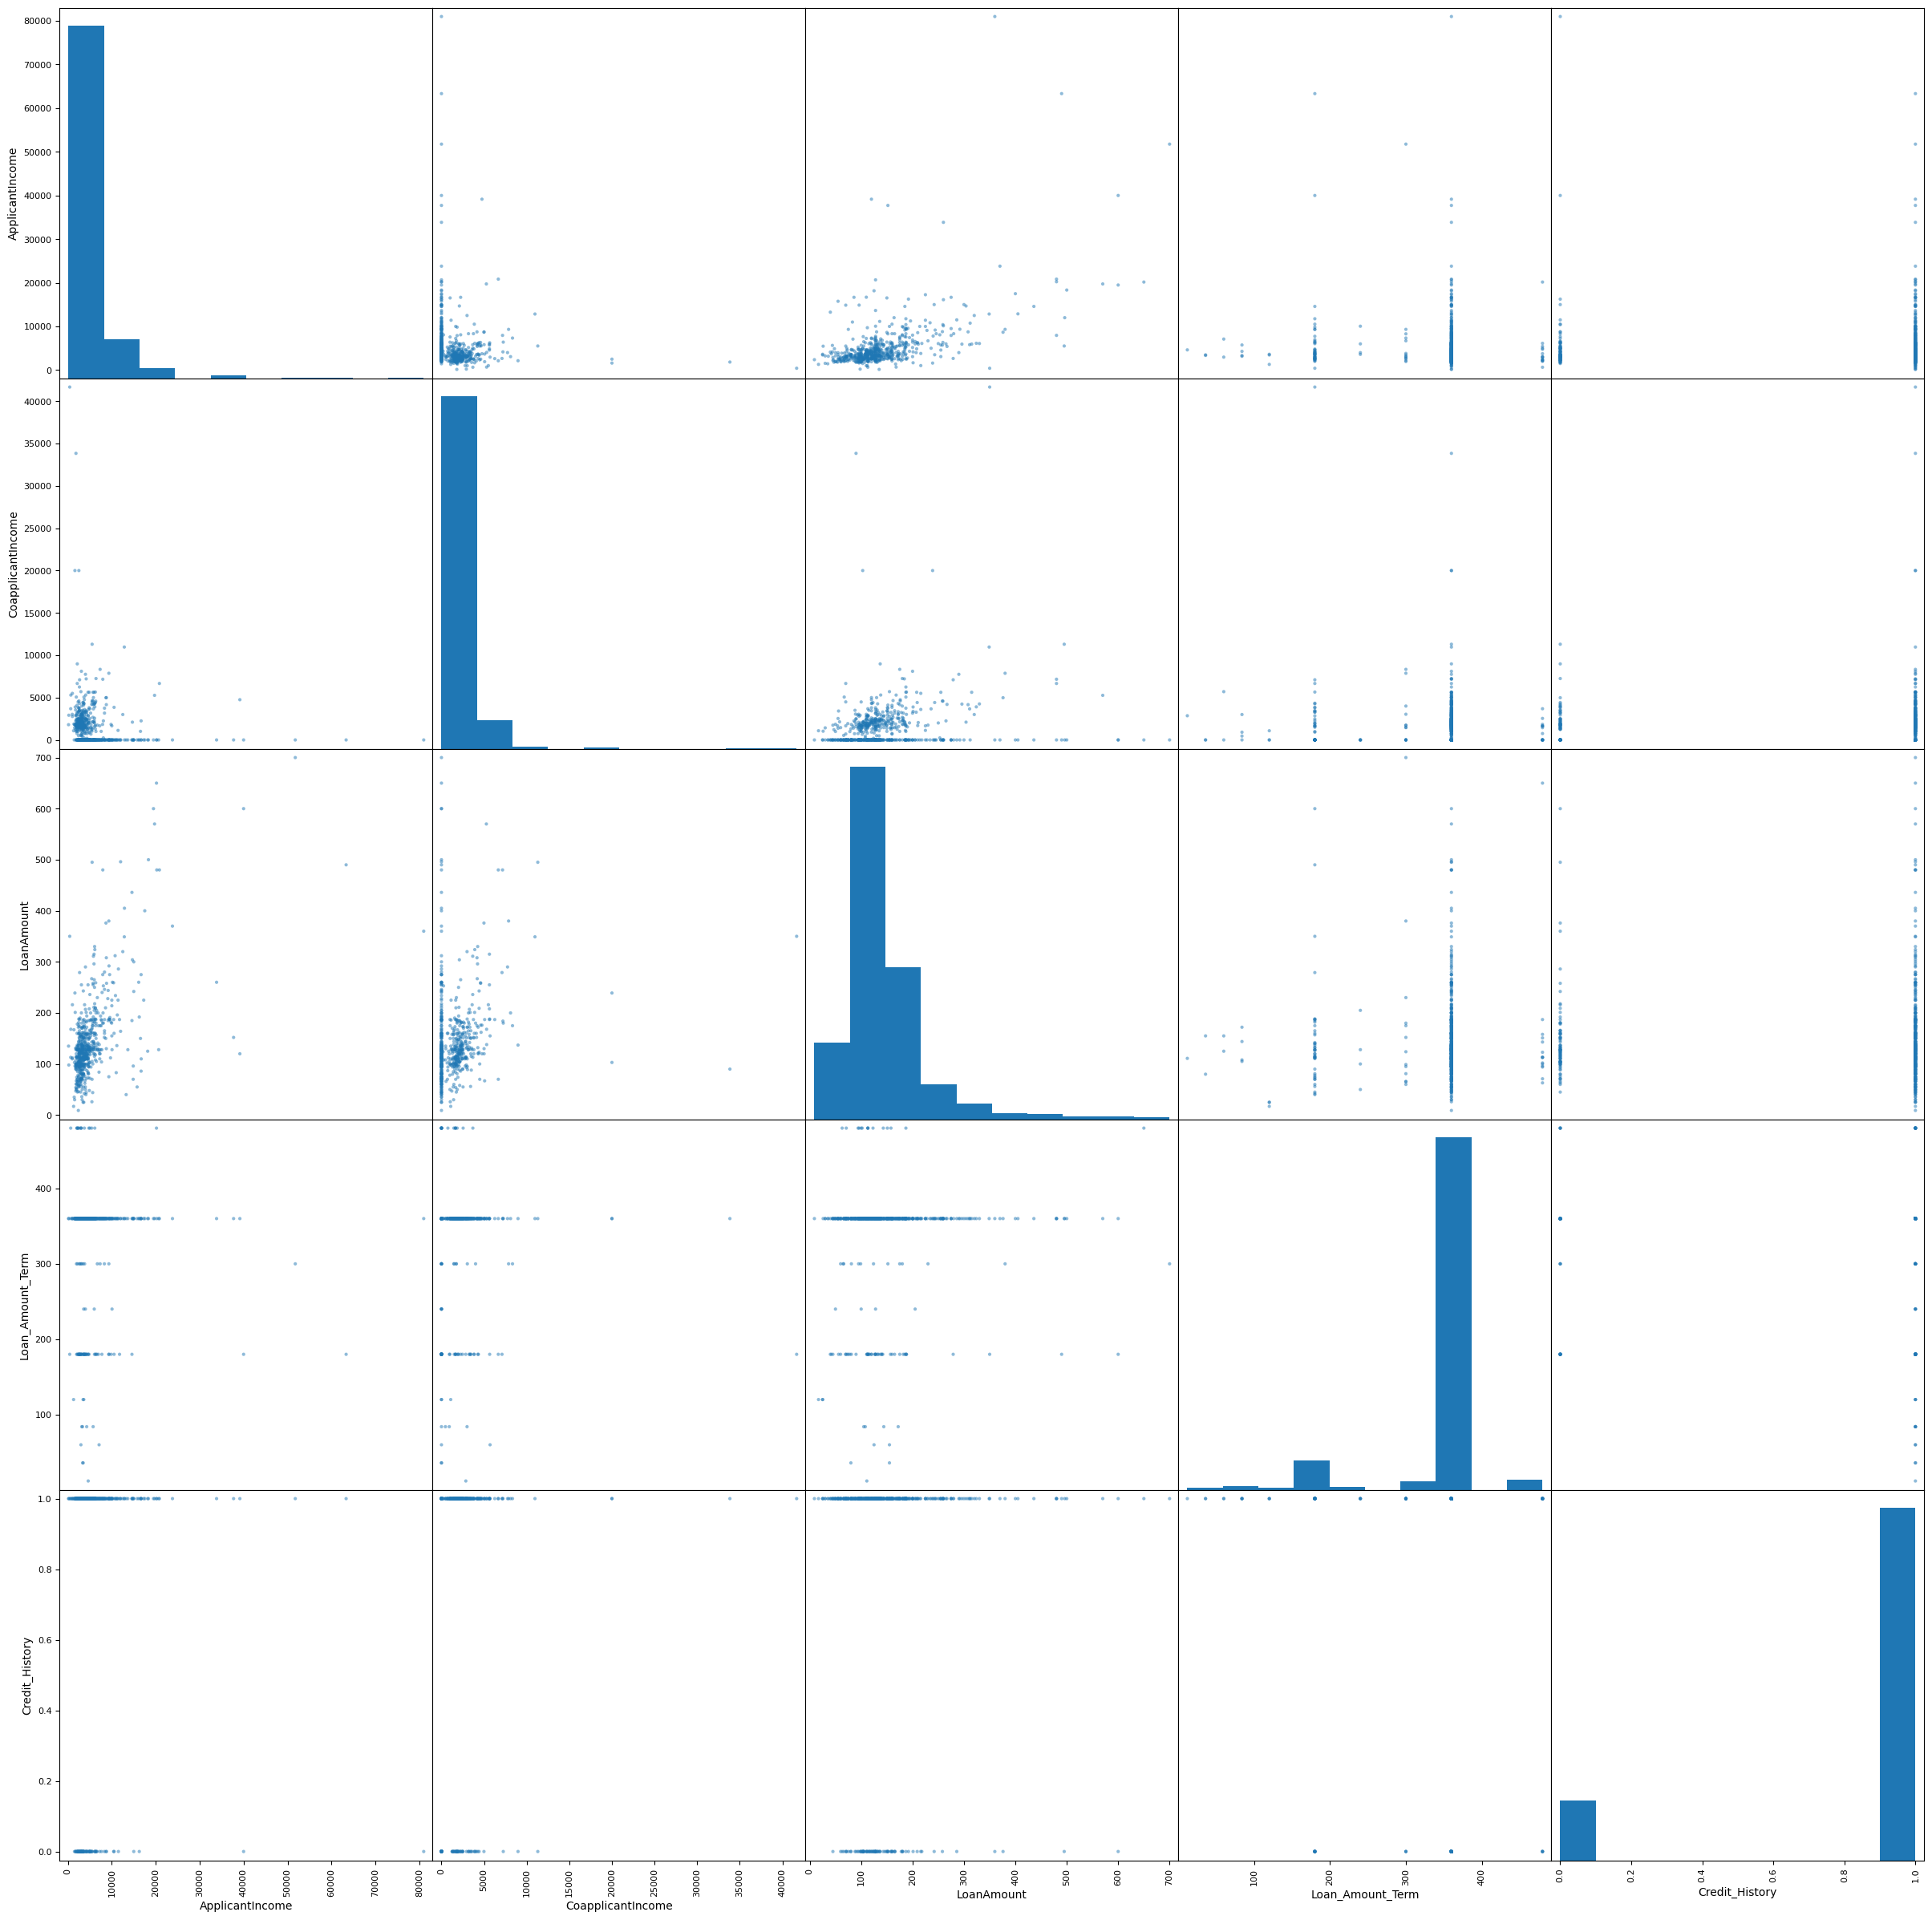

In [79]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical], figsize=(30, 30))
plt.show()

##### Jointplot: Scatterplot with Marginal Distributions
 This creates a scatter plot with a regression line along with the marginal distributions (histograms) of both ApplicantIncome and LoanAmount.The goal of this plot is to visualize the relationship between ApplicantIncome and LoanAmount, while also displaying the distributions of these variables. The regression line helps in understanding the linear relationship between the two variables.

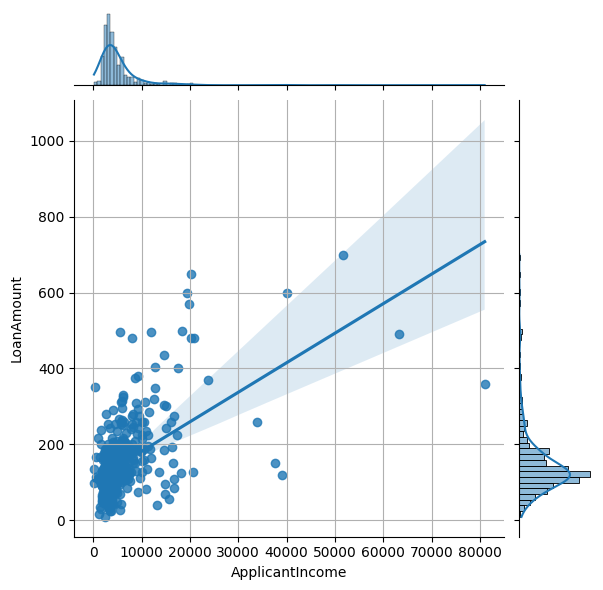

In [80]:
sns.jointplot(x='ApplicantIncome', y='LoanAmount', data=df,kind="reg")
plt.grid(True)

### Qualitative-Qualitative

<center><b><i>Hypothesis 2: "Education" & "Loan_Status".</i></b></center>

<center>
    <b>Null Hypothesis (H0)</b> :
There is no correlation between Education and Loan_Status.</center>


<center><b>Alternative Hypothesis (H1)</b> :
There is a significant correlation between Education and Loan_Status.</center>

In [81]:
t=pd.crosstab(df['Education'], df['Loan_Status'])
t

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


##### Chi-square Test
The chi-square test of independence is used to determine whether the variables "Education" and "Loan_Status" are independent of each other.

In [82]:
stats.chi2_contingency(t)

Chi2ContingencyResult(statistic=4.091490413303621, pvalue=0.04309962129357355, dof=1, expected_freq=array([[150.09771987, 329.90228013],
       [ 41.90228013,  92.09771987]]))

=> Given the p-value of 0.0431 which is less than the significance level of 0.05, we reject the null hypothesis. This indicates that there is a significant association between the two categorical variables being tested.

##### Stacked Bar Chart
Generate a bar chart to visualize the relationship between the variables "Education" and "Loan_Status".

<Axes: xlabel='Education'>

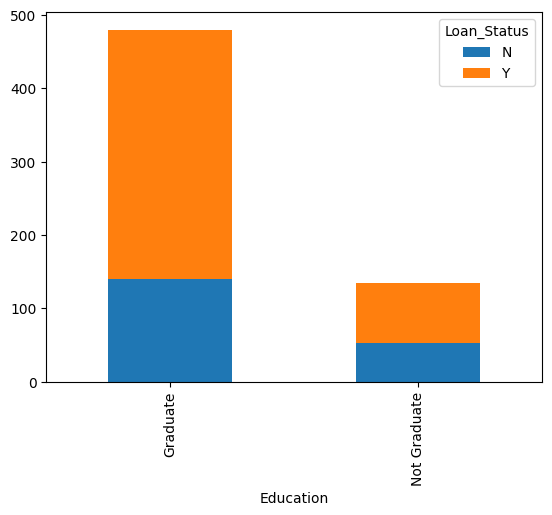

In [83]:
t.plot.bar(stacked=True)

##### Pie Charts
Create a series of pie charts, one for each row of a cross table. Each pie chart will represent the distribution of the categories for that row of the cross table.

array([<Axes: ylabel='N'>, <Axes: ylabel='Y'>], dtype=object)

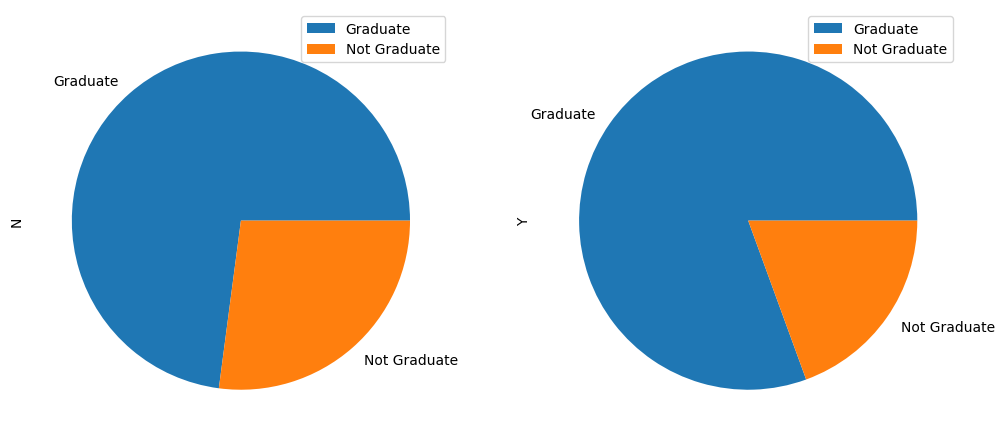

In [84]:
t.plot.pie(subplots=True, figsize = (12, 6))

### Qualitative-Quantitative
<center><b><i>Hypothesis 3:  "Loan_Status" & "ApplicantIncome"</i></b></center>

<center>
    <b>Null Hypothesis (H0)</b> :
There is no correlation between Loan_Status and ApplicantIncome.</center>


<center><b>Alternative Hypothesis (H1)</b> :
There is a significant correlation between Loan_Status and ApplicantIncome.</center>

Compare the means of numerical features across loan status ('Loan_Status') in the dataset, enabling the observation of distinct mean variations between these results.

In [85]:
df[numerical].groupby(df['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,149.890625,344.56250,0.572917
Y,5384.068720,1504.516398,143.869668,341.43128,0.983412


This helps in understanding the income distribution among applicants whose loans were approved versus those whose loans were not by summarizing the applicant incomes for each loan status category.

In [86]:
df.groupby("Loan_Status")["ApplicantIncome"].agg([np.mean, np.std, np.median, np.min, np.max])

,mean,std,median,min,max
Loan_Status,,,,,
N,5446.078125,6819.558528,3833.5,150,81000
Y,5384.068720,5765.441615,3812.5,210,63337


##### Anova Test
This ANOVA test result examines if there's a significant difference in the average applicant income between the two loan status groups (approved and not approved).

In [87]:
from scipy.stats import f_oneway

# Select the data for each specific loan status
data_approved = df['ApplicantIncome'][df['Loan_Status'] == 'Y']
data_rejected = df['ApplicantIncome'][df['Loan_Status'] == 'N']

# The Anova Test
test_anova = f_oneway(data_approved, data_rejected)

print(f"Statistique F : {test_anova.statistic}")
print(f"Valeur p : {test_anova.pvalue}")


Statistique F : 0.013574218522301743
Valeur p : 0.907287812130378


* The F-statistic is very low (0.0136), indicating that the variation in income between the groups is minimal.
* The p-value (0.9073) is much higher than 0.05, suggesting that any difference in applicant incomes between the two groups is not statistically significant.

=> The result indicates that applicant income does not have a significant impact on whether a loan is approved or not.So the Null Hypothesis is approved.

##### Bar Plot
 visualize the average ApplicantIncome for each Loan_Status category using a barplot. This plot helps to compare the average income of applicants who had their loan applications accepted versus those who had them rejected. It provides insight into how applicant income varies with loan approval status, allowing for an understanding of potential income-related trends or disparities in loan acceptance.

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

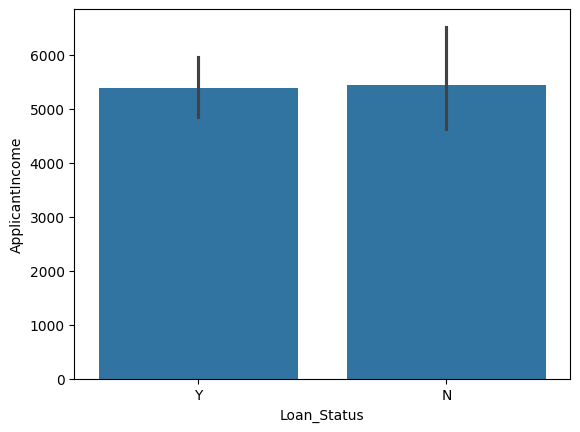

In [88]:
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=df)

##### Histograms
The stacked histogram shows how the income distribution differs between applicants with accepted and rejected loan applications. It helps to compare the income ranges and frequencies for each loan status, providing insights into how income levels are associated with loan approval outcomes.

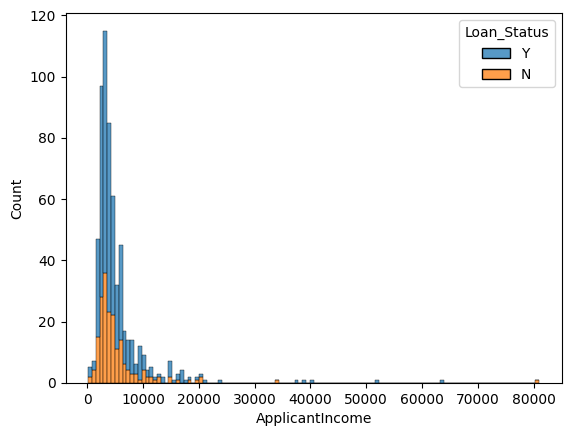

In [89]:
sns.histplot(data=df, x='ApplicantIncome', hue='Loan_Status', multiple='stack')
plt.show()

##### Boxplots

Generate a box plot for each numerical variable in the dataframe, broken down by diagnosis category, providing a visual comparison of the distributions and potential outliers between the two loan status.

array([[<Axes: title={'center': 'ApplicantIncome'}, xlabel='[Loan_Status]'>,
        <Axes: title={'center': 'CoapplicantIncome'}, xlabel='[Loan_Status]'>,
        <Axes: title={'center': 'Credit_History'}, xlabel='[Loan_Status]'>,
        <Axes: title={'center': 'LoanAmount'}, xlabel='[Loan_Status]'>,
        <Axes: title={'center': 'Loan_Amount_Term'}, xlabel='[Loan_Status]'>,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

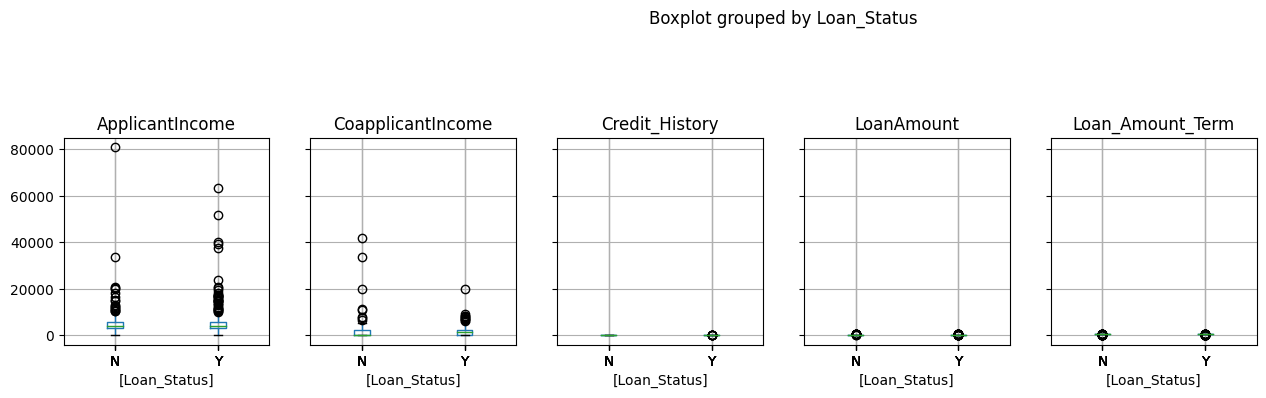

In [90]:
df.boxplot(by = "Loan_Status",layout=(5, 6), figsize=(18, 16))

Generate box plots for the "ApplicantIncome" variable, broken down by Loan_Status category

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

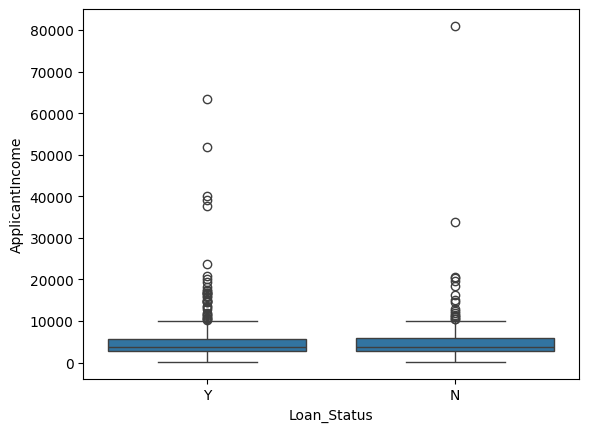

In [91]:
sns.boxplot(x="Loan_Status",y="ApplicantIncome",data=df)

##### Violin Plot
 The violin plot combines aspects of a box plot and a kernel density plot, showing the density of income values and the spread of the data for each loan status.Violin width indicates value density: greater width suggests higher value density at that location.

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

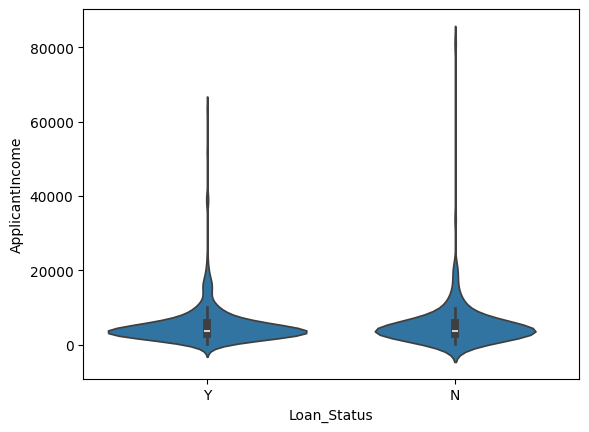

In [92]:
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=df)

##### Facet Grid & Histplot
Creates a grid of subplots based on the Loan_Status column, allowing  to compare the distribution of ApplicantIncome across different loan statuses.
The histogram plots the distribution of ApplicantIncome for each loan status with 10 bins to visualize the frequency of income ranges.

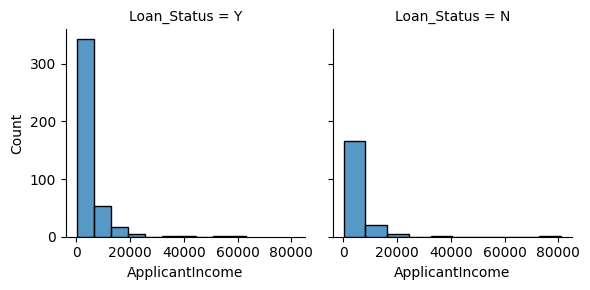

In [93]:
# Create a FacetGrid object for "Loan_Status"
g = sns.FacetGrid(df, col='Loan_Status')
# Add a histogram to each facet for "ApplicantIncome" with 10 bins
g.map(sns.histplot, 'ApplicantIncome', bins=10)

##### Scatter plot
The goal of creating a scatter plot using "ApplicantIncome", "CoapplicantIncome", and "Loan_Status" is to visualize the relationship between the applicant's income and the loan amount they have applied for, segmented by the loan status (approved or rejected). This visualization can help in identifying whether certain income levels are associated with higher or lower loan amounts and how these factors influence the likelihood of loan approval.

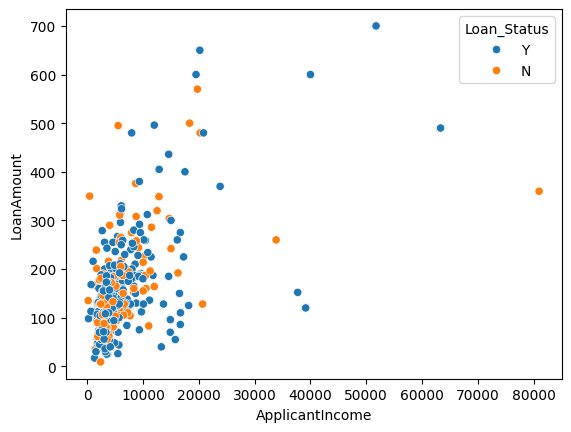

In [94]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount",hue="Loan_Status", data=df)
plt.show()

## Overview Visualization

##### Pair Plot
this plot helps to visualize pairwise relationships in the dataset across multiple features, segmented by the loan status (approved or rejected). This comprehensive visualization helps in identifying correlations, distributions, and patterns between different variables, while also highlighting how these relationships differ for approved and rejected loans.



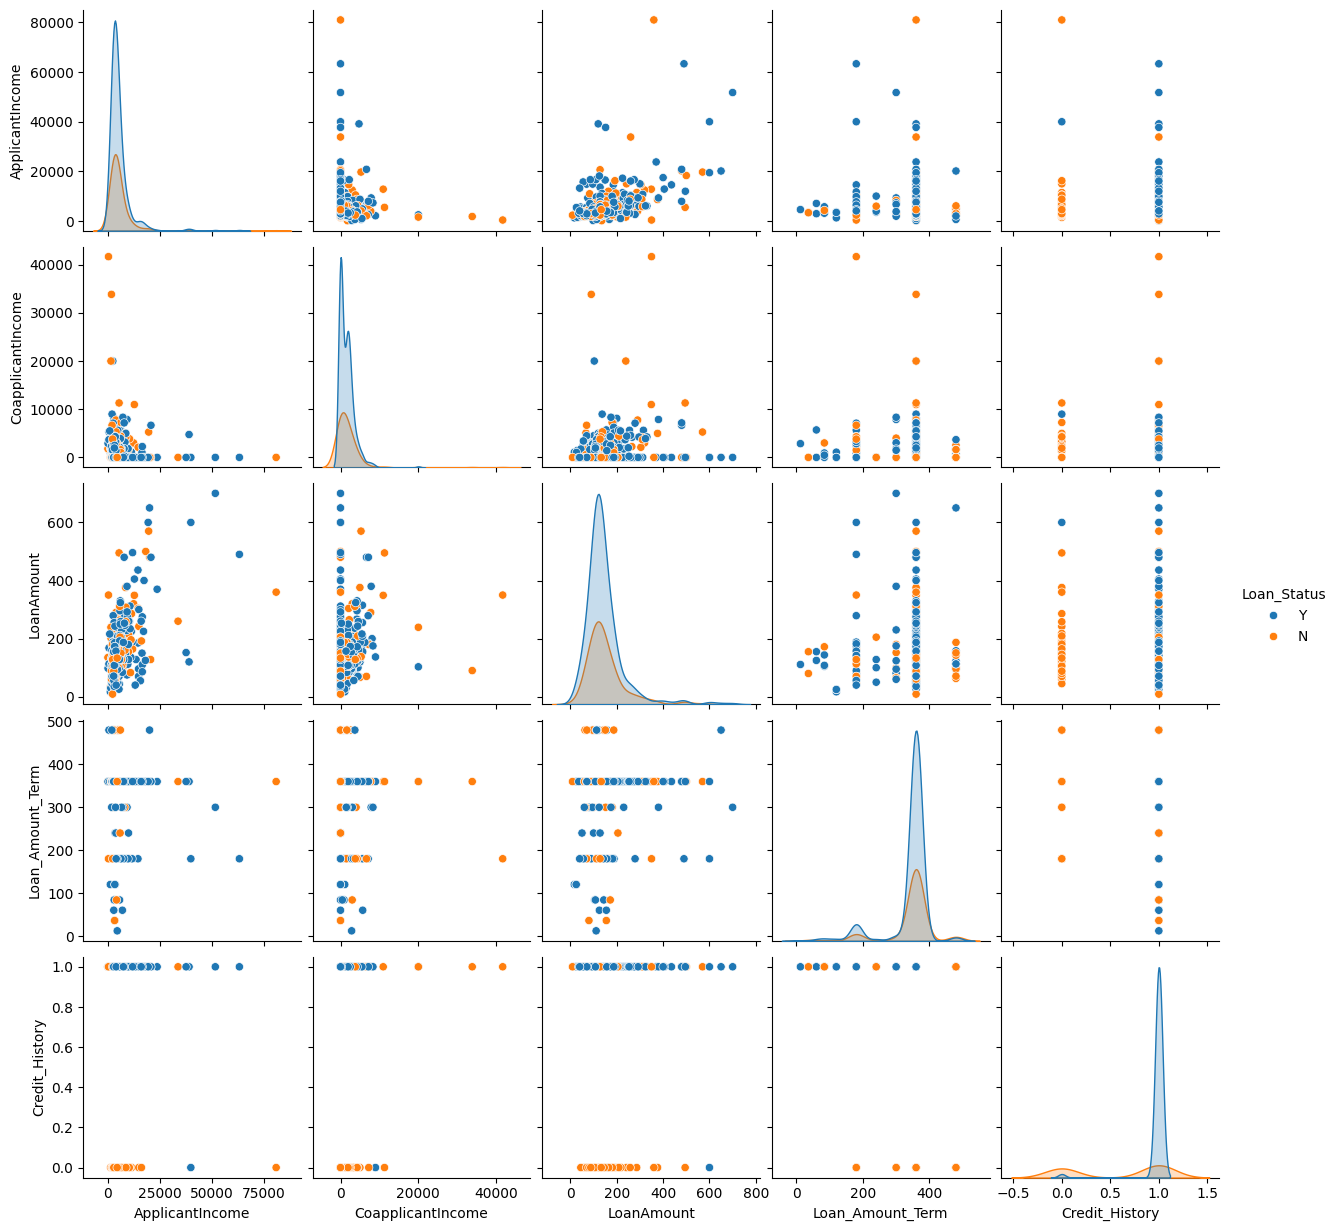

In [95]:
sns.pairplot(df, hue='Loan_Status')

##### Heatmap
visualizing the correlation matrix of the dataset using a Heatmap. This helps in identifying the strength and direction of relationships between different features after converting categorical variables into numerical form and standardizing the data.

In [96]:
# Step 1: Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)

In [97]:
# Step 2: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

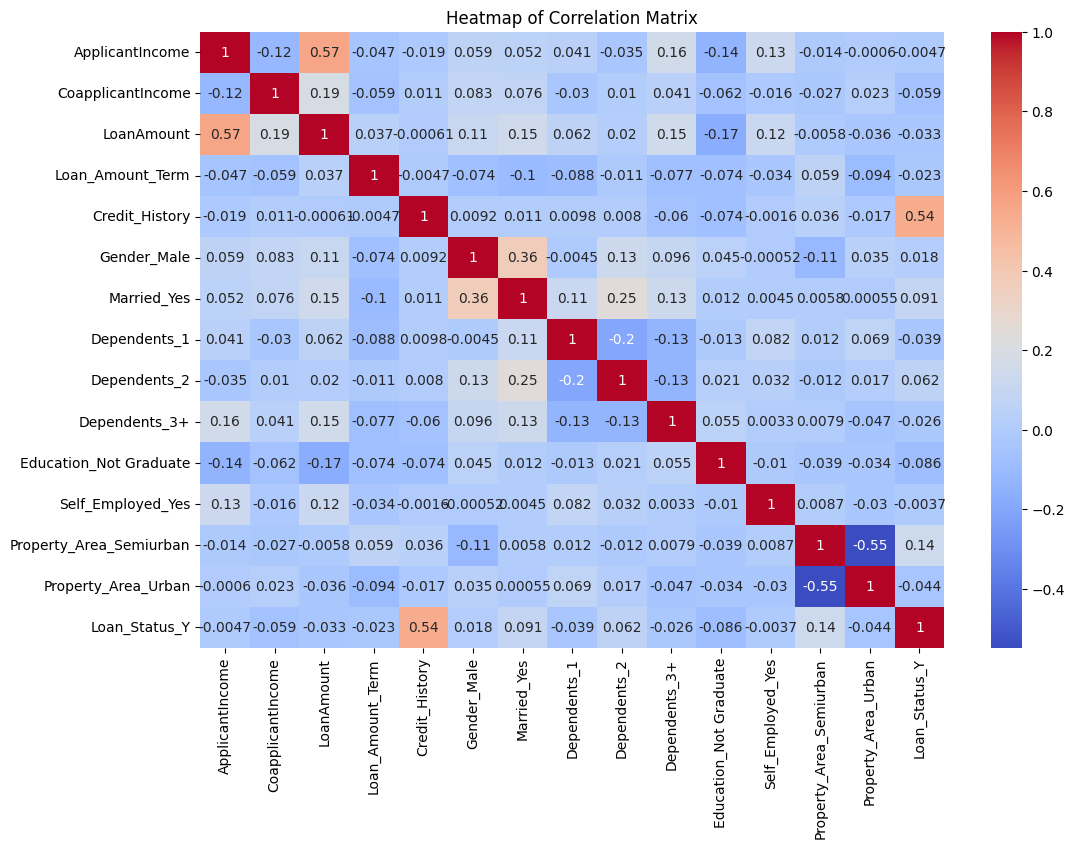

In [98]:
# Step 3: Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()